In [1]:
import nbimporter
from RADARDataCapture import FMCWRADARDataCapture
from MOCAPDataCapture import MOCAPDataCapture
from FPDataCapture import FPDataCapture
import h5py
import os
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
from datetime import datetime
import statistics
from matplotlib import animation

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Force Plate Time Conversion

In [2]:
# Usage example:
base_file_path = '/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_FP_Data/04/04_MNTRL_MC_V1.tsv'
radar_file_path = "/Volumes/FourTBLacie/Yoga_Study_RADAR_Data_Renamed/04/04_MNTRL_RR_V1.h5"
fp_data_capture = FPDataCapture(base_file_path)
lift_times, down_times = fp_data_capture.identify_foot_lift()
# Now you can access the times directly
# print(f"Foot Lift Times: {lift_times}")
# print(f"Foot Down Times: {down_times}")

fp_data_capture.convert_force_plate_time_to_frames()

# print(f"Foot Lift FRAMES: {fp_data_capture.foot_lift_frames_after_actuator}")
# print(f"Foot Down FRAMES: {fp_data_capture.foot_down_frames_after_actuator}")


Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/04_MNTRL_MC_V1_f_1.csv
Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/04_MNTRL_MC_V1_f_2.csv
     RADAR_capture  Seconds_per_Frame  MOCAP_Start_Time  RADAR_Start_Frame
0   01_MNTRL_RR_V1           0.036454              1.86                 44
1   01_MNTRL_RR_V2           0.036464              1.90                 41
2   01_MNTRL_RR_V3           0.036547              1.92                 43
3   01_MNTRR_RR_V1           0.036467              1.91                 45
4   01_MNTRR_RR_V2           0.036370              1.95                 41
..             ...                ...               ...                ...
84  24_MNTRL_RR_V2           0.037627              1.97                 42
85  24_MNTRL_RR_V3           0.037582              2.09                 44
86  24_MNTRR_RR_V1         

RADAR Processing

In [27]:
radar_file_path = "/Volumes/FourTBLacie/Yoga_Study_RADAR_Data_Renamed/12/12_MNTRR_RR_V3.h5"
# Initialize the FMCWRADARDataCapture object
test_data = FMCWRADARDataCapture(file_path=radar_file_path)

# Load and save the data
dataCubes = test_data.load_and_save()

print(dataCubes.shape)

# Process the data with Range-Doppler processing
processed_data = test_data.range_doppler_processing(dataCubes)

(4, 1000, 256, 128)


Save 4 channels and transitions separately

In [5]:
output_folder_path = "/Volumes/FourTBLaCie/Yoga_Study_RADAR_Channel_Tx_LogScale"
file_name = radar_file_path.split("/")[-1].split(".")[0]

# Ensure the output folder exists
if not os.path.exists(output_folder_path + '/' + file_name[:2]):
    os.makedirs(output_folder_path + '/' + file_name[:2])
    
gif_filename = radar_file_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'

In [6]:
test_data.process_and_save_channels_tx_separately(data=processed_data, output_folder_path=output_folder_path, file_name=file_name)

04_MNTRL_RR_V1 processed and saved


In [7]:
# Since we previously simulated saving .npy files instead of actually saving them,
# let's simulate loading one of those processed data files and then generate a GIF from it.
# For demonstration, we'll create a smaller random data array representing processed data.

# Generate a smaller sample data to simulate loaded processed data
sample_data = np.load('/Volumes/FourTBLaCie/Yoga_Study_RADAR_Channel_Tx_LogScale/04/04_MNTRL_RR_V1_channel_1_tx1.npy')

# Define a function to create a GIF from the numpy array
def create_gif_from_loaded_data(data, output_filename):
    fig, ax = plt.subplots()
    img = ax.imshow(data[0], cmap='gray', vmin=0, vmax=1)

    def update(frame):
        img.set_data(data[frame])
        return (img,)

    ani = animation.FuncAnimation(fig, update, frames=len(data), blit=True)
    ani.save(output_filename, writer='pillow', fps=10)
    plt.close()

# Output filename for the GIF
loaded_gif_output_filename = f'/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/{gif_filename}'

# test_data.create_gif(self, data=sample_data, gif_filename=gif_filename, fp_data_capture)

# Create the GIF
create_gif_from_loaded_data(sample_data, loaded_gif_output_filename)

loaded_gif_output_filename


'/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/04_MNTRL_RR_V1__2024-02-16 13:51:09.189029.gif'

Gif Generation

04_MNTRL_RR_V1__2024-02-16 09:37:09.879292.gif


KeyboardInterrupt: 

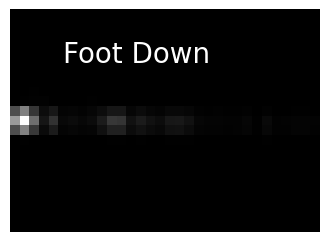

In [5]:
gif_filename = radar_file_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'
print(gif_filename)
gif_path = test_data.create_gif(processed_data[0], gif_filename, fp_data_capture)
print(f"GIF saved to {gif_path}")

Batch process RADAR Data with separate channels and transitions for classification

In [28]:
# Define the lists of parameters
participants = ['01', '02', '03', '04', '05', '08', '10', '12', '13', '14', '15', '16', '18', '22', '24']
participants = ['12']
movements = ["CT2CW", "FF2MN","CRW2R", "CRW2L", "MNTRL", "MNTRR"]
movements = ["MNTRR"]
versions = ["V1", "V2", "V3"]
versions = ["V3"]

output_folder_path = "/Volumes/FourTBLaCie/Yoga_Study_RADAR_Channel_Tx_LogScale"

problem_list = []

# Loop over each combination of participant, movement, and version
for participant in participants:
    for movement in movements:
        for version in versions:
            # Construct file paths
            RADAR_capture = f"{participant}_{movement}_RR_{version}"

            radar_file_path = f"/Volumes/DANS SAND/Yoga_Study_RADAR_Data_Renamed/{participant}/{RADAR_capture}.h5"
            
            try:
                # Initialize the FMCWRADARDataCapture object
                RADAR_object = FMCWRADARDataCapture(file_path=radar_file_path)
            except Exception as e:
                problem_list.append((RADAR_capture, e))
                continue

            # Load and save the data
            dataCubes = RADAR_object.load_and_save()

            # Process the data with Range-Doppler processing
            processed_data = RADAR_object.range_doppler_processing(dataCubes)
            
            file_name = radar_file_path.split("/")[-1].split(".")[0]
            
            RADAR_object.process_and_save_channels_tx_separately(data=processed_data, output_folder_path=output_folder_path, file_name=file_name)
            


12_MNTRR_RR_V3 processed and saved


In [9]:
print(problem_list)
print(np.load('/Volumes/FourTBLaCie/Yoga_Study_RADAR_Channel_Tx/12/12_CT2CW_RR_V2_channel_4_tx3.npy').shape)

[('12_MNTRL_RR_V1', FileNotFoundError("The file '/Volumes/DANS SAND/Yoga_Study_RADAR_Data_Renamed/12/12_MNTRL_RR_V1.h5' does not exist."))]
(83, 23, 32)


Background Noise Processing

In [2]:
background_noise_file_path = '/Volumes/FourTBLaCie/Yoga_Study_BackgroundNoise/BackgroundNoise.h5'
output_folder_path = '/Volumes/FourTBLaCie/Yoga_Study_BackgroundNoise/Channel_Tx'

# Initialize the FMCWRADARDataCapture object
RADAR_object = FMCWRADARDataCapture(file_path=background_noise_file_path)

# Load and save the data
dataCubes = RADAR_object.load_and_save()

# Process the data with Range-Doppler processing
processed_data = RADAR_object.range_doppler_processing(dataCubes)

file_name = background_noise_file_path.split("/")[-1].split(".")[0]

RADAR_object.process_and_save_channels_tx_separately(data=processed_data, output_folder_path=output_folder_path, file_name=file_name)

BackgroundNoise processed and saved


In [14]:
gif_filename = radar_file_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'
print(gif_filename)
gif_path = RADAR_object.create_gif(processed_data[0], gif_filename, fp_data_capture)
print(f"GIF saved to {gif_path}")

BackgroundNoise__2024-02-16 14:29:27.996808.gif
GIF saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/BackgroundNoise__2024-02-16 14:29:27.996808.gif


In [7]:
import numpy as np
import os

# Specify the directory containing the .npy files
directory = '/Volumes/FourTBLaCie/Yoga_Study_BackgroundNoise/Channel_Tx/BackgroundNoise_Channel_Tx'

# Specify the directory where you want to save the averaged .npy files
output_directory = '/Volumes/FourTBLaCie/Yoga_Study_BackgroundNoise/Averaged_Channel_Tx'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Loop over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.npy'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)

        # Load the .npy file
        data = np.load(file_path)
        
        print(data.shape)

        # Check if the data shape is as expected
        if data.shape == (83, 23, 32):
            # Average the data along the first dimension
            averaged_data = np.mean(data, axis=0, keepdims=True)

            # Construct the output file path
            output_file_path = os.path.join(output_directory, filename)

            # Save the averaged data to a new .npy file
            np.save(output_file_path, averaged_data)
        else:
            print(f"Skipping {filename} due to unexpected shape: {data.shape}")
    else:
        # Skip non-.npy files
        continue

print("Processing complete.")


(83, 23, 32)
(83, 23, 32)
(83, 23, 32)
(83, 23, 32)
(83, 23, 32)
(83, 23, 32)
(83, 23, 32)
(83, 23, 32)
(83, 23, 32)
(83, 23, 32)
(83, 23, 32)
(83, 23, 32)
Processing complete.


Generate new npy files with log scale and background removed

In [30]:
# Define the lists of parameters
participants = ['01', '02', '03', '04', '05', '08', '10', '12', '13', '14', '15', '16', '18', '22', '24']
participants = ['12']
movements = ["CT2CW", "FF2MN","CRW2R", "CRW2L", "MNTRL", "MNTRR"]
movements = ["MNTRR"]
versions = ["V1", "V2", "V3"]
versions = ["V3"]

import re

# Directories
averaged_directory = '/Volumes/FourTBLaCie/Yoga_Study_BackgroundNoise/Averaged_Channel_Tx'
data_directory = "/Volumes/FourTBLaCie/Yoga_Study_RADAR_Channel_Tx_LogScale"
output_directory = "/Volumes/FourTBLaCie/Yoga_Study_RADAR_Channel_Tx_LS_BGremoved"

# Regex to match filenames and extract details
filename_pattern = re.compile(r'.*_channel_([1-4])_tx([1-3])\.npy$')

# Load averaged files into a dictionary keyed by version, channel, and TX number
averaged_data = {}
for filename in os.listdir(averaged_directory):
    match = filename_pattern.match(filename)
    if match:
        channel, tx = match.groups()
        print(key)
        key = (channel, tx)  # Updated key to reflect new order
        file_path = os.path.join(averaged_directory, filename)
        averaged_data[key] = np.load(file_path)

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Loop over all files in the data directory including subdirectories
for root, _, filenames in os.walk(data_directory):
    for filename in filenames:
        print(filename)
        match = filename_pattern.match(filename)
        if match:
            channel, tx = match.groups()  # Assuming the pattern includes version
            key = (channel, tx)  # Updated key to reflect inclusion of version

            # Check for corresponding averaged data
            if key in averaged_data:
                data_file_path = os.path.join(root, filename)
                data = np.load(data_file_path)

                # Subtract the averaged data
                subtracted_data = data - averaged_data[key]


                # Construct the output path, maintaining the original subdirectory structure
                output_subdir = os.path.join(output_directory, filename[:2])
                os.makedirs(output_subdir, exist_ok=True)

                # Save the subtracted data in the output directory
                subtracted_file_path = os.path.join(output_subdir, filename)
                np.save(subtracted_file_path, subtracted_data)
            else:
                print(f"No averaged data found for {filename} with key {key}. Skipping.")
        else:
            # Skip files that do not match the naming convention
            continue

print("Processing complete.")

('1', '2')
('1', '2')
('2', '2')
('3', '2')
('4', '2')
('4', '3')
('3', '3')
('4', '1')
('2', '3')
('3', '1')
('2', '1')
('1', '3')
12_CT2CW_RR_V1_channel_1_tx1.npy
12_CT2CW_RR_V1_channel_1_tx2.npy
12_CT2CW_RR_V1_channel_1_tx3.npy
12_CT2CW_RR_V1_channel_2_tx1.npy
12_CT2CW_RR_V1_channel_2_tx2.npy
12_CT2CW_RR_V1_channel_2_tx3.npy
12_CT2CW_RR_V1_channel_3_tx1.npy
12_CT2CW_RR_V1_channel_3_tx2.npy
12_CT2CW_RR_V1_channel_3_tx3.npy
12_CT2CW_RR_V1_channel_4_tx1.npy
12_CT2CW_RR_V1_channel_4_tx2.npy
12_CT2CW_RR_V1_channel_4_tx3.npy
12_CT2CW_RR_V2_channel_1_tx1.npy
12_CT2CW_RR_V2_channel_1_tx2.npy
12_CT2CW_RR_V2_channel_1_tx3.npy
12_CT2CW_RR_V2_channel_2_tx1.npy
12_CT2CW_RR_V2_channel_2_tx2.npy
12_CT2CW_RR_V2_channel_2_tx3.npy
12_CT2CW_RR_V2_channel_3_tx1.npy
12_CT2CW_RR_V2_channel_3_tx2.npy
12_CT2CW_RR_V2_channel_3_tx3.npy
12_CT2CW_RR_V2_channel_4_tx1.npy
12_CT2CW_RR_V2_channel_4_tx2.npy
12_CT2CW_RR_V2_channel_4_tx3.npy
12_CT2CW_RR_V3_channel_1_tx1.npy
12_CT2CW_RR_V3_channel_1_tx2.npy
12_CT2CW_R

Check to see how the average removed ones look

In [21]:
# Since we previously simulated saving .npy files instead of actually saving them,
# let's simulate loading one of those processed data files and then generate a GIF from it.
# For demonstration, we'll create a smaller random data array representing processed data.

# Generate a smaller sample data to simulate loaded processed data
sample_data_path = '/Volumes/FourTBLaCie/Yoga_Study_RADAR_Channel_Tx_LS_BGremoved/10/10_MNTRL_RR_V1_channel_1_tx1.npy'
sample_data = np.load(sample_data_path)
gif_filename = sample_data_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'

# Define a function to create a GIF from the numpy array
def create_gif_from_loaded_data(data, output_filename):
    fig, ax = plt.subplots()
    img = ax.imshow(data[0], cmap='gray', vmin=0, vmax=1)

    def update(frame):
        img.set_data(data[frame])
        return (img,)

    ani = animation.FuncAnimation(fig, update, frames=len(data), blit=True)
    ani.save(output_filename, writer='pillow', fps=10)
    plt.close()

# Output filename for the GIF
loaded_gif_output_filename = f'/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/{gif_filename}'

# test_data.create_gif(self, data=sample_data, gif_filename=gif_filename, fp_data_capture)

# Create the GIF
create_gif_from_loaded_data(sample_data, loaded_gif_output_filename)

loaded_gif_output_filename

'/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/10_MNTRL_RR_V1_channel_1_tx1__2024-02-16 16:27:53.270901.gif'

Normalize post subtraction

In [45]:
# Paths
source_directory = "/Volumes/FourTBLaCie/Yoga_Study_RADAR_Channel_Tx_LS_BGremoved"
destination_directory = "/Volumes/FourTBLaCie/Yoga_Study_RADAR_Ch_Tx_LS_BGR_Norm_83"

# Loop over every npy file in the source directory and its subdirectories
for root, dirs, files in os.walk(source_directory):
    for file in files:
        if file.endswith(".npy"):
            # Construct the full path to the current file
            file_path = os.path.join(root, file)
            
            # Load the .npy file
            data = np.load(file_path)[:,:,:13]
            
            # Normalize each frame in the data
            normalized_data = np.zeros_like(data)
            for i in range(data.shape[0]):  # Assuming data shape is (frames, height, width)
                frame = data[i]
                rdm_max = np.max(frame)
                rdm_min = np.min(frame)
                normalized_frame = (frame - rdm_min) / (rdm_max - rdm_min + 1e-3)  # Normalize
                normalized_data[i] = normalized_frame
            
            # Construct the path for the normalized file in the destination directory
            # Preserving the subfolder hierarchy
            relative_path = os.path.relpath(root, source_directory)
            destination_subfolder = os.path.join(destination_directory, relative_path)
            os.makedirs(destination_subfolder, exist_ok=True)  # Ensure the subfolder exists
            normalized_file_path = os.path.join(destination_subfolder, file)
            
            # Save the normalized data
            np.save(normalized_file_path, normalized_data)

print("Normalization and saving complete.")


Normalization and saving complete.


In [46]:
# Since we previously simulated saving .npy files instead of actually saving them,
# let's simulate loading one of those processed data files and then generate a GIF from it.
# For demonstration, we'll create a smaller random data array representing processed data.

# Generate a smaller sample data to simulate loaded processed data
sample_data_path = '/Volumes/FourTBLaCie/Yoga_Study_RADAR_Ch_Tx_LS_BGR_Norm_83/04/04_MNTRL_RR_V1_channel_1_tx1.npy'
sample_data = np.load(sample_data_path)
print(sample_data.shape)
gif_filename = sample_data_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'

# Define a function to create a GIF from the numpy array
def create_gif_from_loaded_data(data, output_filename):
    fig, ax = plt.subplots()
    img = ax.imshow(data[0], cmap='gray', vmin=0, vmax=1)

    def update(frame):
        img.set_data(data[frame])
        return (img,)

    ani = animation.FuncAnimation(fig, update, frames=len(data), blit=True)
    ani.save(output_filename, writer='pillow', fps=10)
    plt.close()

# Output filename for the GIF
loaded_gif_output_filename = f'/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/{gif_filename}'

# test_data.create_gif(self, data=sample_data, gif_filename=gif_filename, fp_data_capture)

# Create the GIF
create_gif_from_loaded_data(sample_data, loaded_gif_output_filename)

loaded_gif_output_filename

(83, 23, 13)


'/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/04_MNTRL_RR_V1_channel_1_tx1__2024-02-17 14:40:54.911942.gif'

Force Plate Data

<bound method NDFrame.head of        SAMPLE      time    Force_X   Force_Y     Force_Z   Moment_X  \
0           1   0.00000 -21.133900 -1.602173  390.478134 -33.188438   
1           2   0.00083 -21.896839 -1.602173  390.478134 -33.188438   
2           3   0.00167 -21.286488 -1.144409  389.867783 -33.005333   
3           4   0.00250 -21.439075 -1.144409  389.867783 -33.188438   
4           5   0.00333 -21.744251 -1.602173  389.562607 -33.279991   
...       ...       ...        ...       ...         ...        ...   
47995   47996  39.99583 -11.520386 -0.076294  771.953583 -73.472214   
47996   47997  39.99667 -11.367798  0.076294  771.038055 -73.380661   
47997   47998  39.99750 -11.825562 -0.076294  771.343231 -73.380661   
47998   47999  39.99833 -11.520386 -0.076294  771.038055 -73.472214   
47999   48000  39.99917 -11.367798 -0.228882  771.343231 -73.380661   

        Moment_Y   Moment_Z      COP_X      COP_Y  COP_Z  
0     -33.844566 -25.383425  86.674677 -84.994358    0.0  

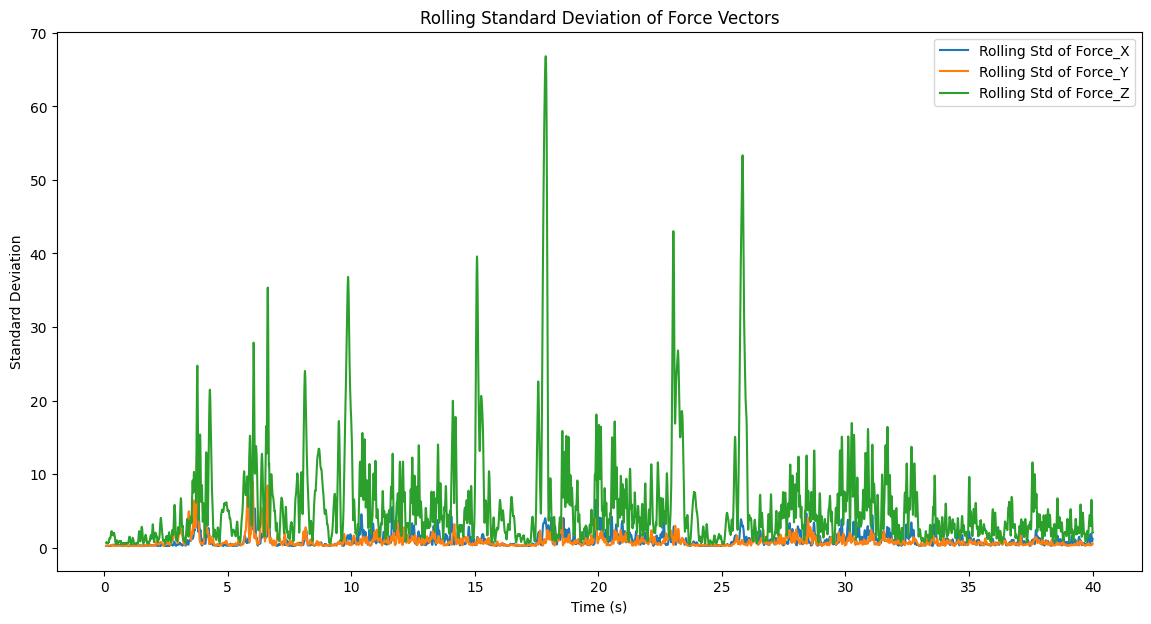

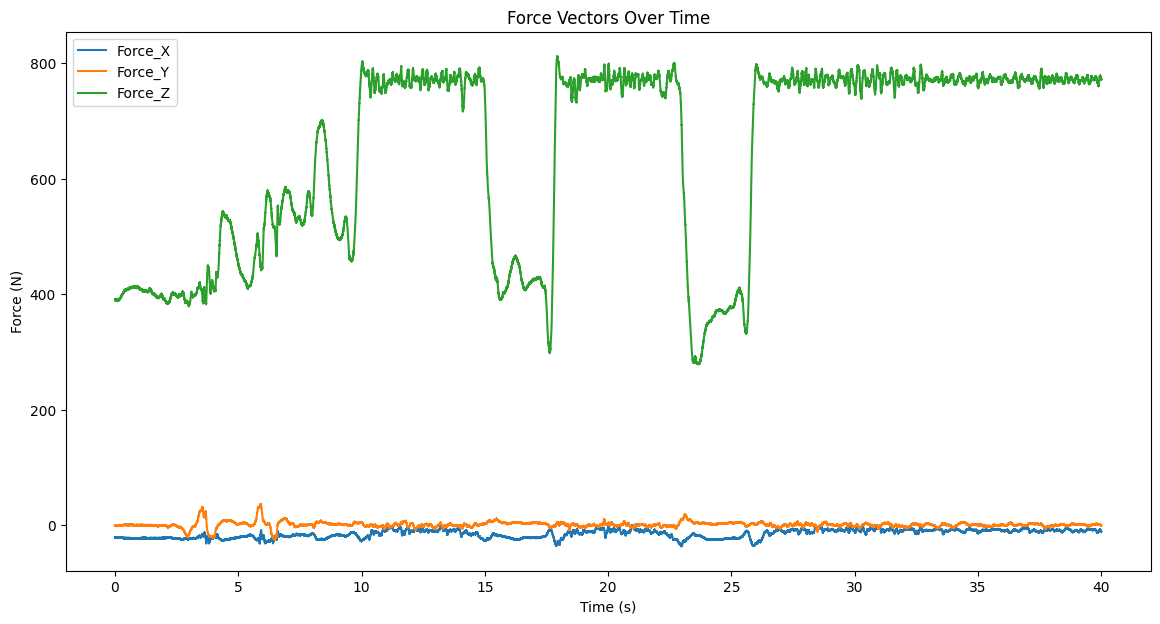

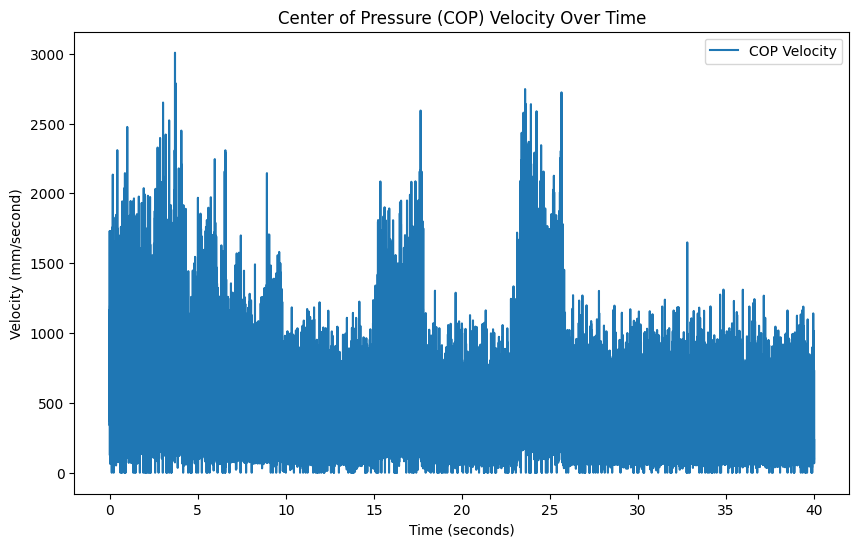

In [3]:
fp_data_capture.calculate_rolling_std()
fp_data_capture.plot_rolling_std()
fp_data_capture.plot_force_vectors()
fp_data_capture.calculate_and_plot_cop_velocity()

GIF COP

In [4]:
gif_filename = base_file_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'
#fp_data_capture.generate_cop_trace_gif(gif_filename)
fp_data_capture.generate_cop_trace_gif_fu_only(gif_filename)

GIF saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/04_MNTRL_MC_V1__2024-02-14 10:55:55.155191.gif


Subject 10

In [2]:
# Usage example:
base_file_path = '/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_FP_Data/10/10_MNTRL_MC_V1.tsv'
radar_file_path = "/Volumes/FourTBLacie/Yoga_Study_RADAR_Data_Renamed/10/10_MNTRL_RR_V1.h5"
fp_data_capture = FPDataCapture(base_file_path)
lift_times, down_times = fp_data_capture.identify_foot_lift()
# Now you can access the times directly
print(f"Foot Lift Times: {lift_times}")
print(f"Foot Down Times: {down_times}")

fp_data_capture.convert_force_plate_time_to_frames()

print(f"Foot Lift FRAMES: {fp_data_capture.foot_lift_frames_after_actuator}")
print(f"Foot Down FRAMES: {fp_data_capture.foot_down_frames_after_actuator}")


Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/10_MNTRL_MC_V1_f_1.csv
Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/10_MNTRL_MC_V1_f_2.csv
Foot Lift Times: [10.11417, 18.61083, 26.0925]
Foot Down Times: [15.2925, 23.03583]
     RADAR_capture  Seconds_per_Frame  MOCAP_Start_Time  RADAR_Start_Frame
0   01_MNTRL_RR_V1           0.036454              1.86                 44
1   01_MNTRL_RR_V2           0.036464              1.90                 41
2   01_MNTRL_RR_V3           0.036547              1.92                 43
3   01_MNTRR_RR_V1           0.036467              1.91                 45
4   01_MNTRR_RR_V2           0.036370              1.95                 41
..             ...                ...               ...                ...
84  24_MNTRL_RR_V2           0.037627              1.97                 42
85  24_MNTRL_RR_V3

<bound method NDFrame.head of        SAMPLE      time    Force_X   Force_Y     Force_Z   Moment_X  \
0           1   0.00000 -13.351440 -5.264282  296.788216 -57.083988   
1           2   0.00083 -13.198853 -5.569458  296.483040 -57.358646   
2           3   0.00167 -13.198853 -5.722046  296.788216 -57.175541   
3           4   0.00250 -13.656616 -5.569458  297.398567 -57.267094   
4           5   0.00333 -12.893677 -5.569458  296.177864 -56.809330   
...       ...       ...        ...       ...         ...        ...   
47995   47996  39.99583  -9.689331 -0.381470  633.707047 -90.775967   
47996   47997  39.99667  -9.536743 -0.076294  633.401871 -90.867519   
47997   47998  39.99750  -8.773804  0.076294  633.401871 -90.867519   
47998   47999  39.99833  -9.231567 -0.381470  632.181168 -90.684414   
47999   48000  39.99917  -9.078979 -0.381470  633.707047 -90.684414   

        Moment_Y   Moment_Z      COP_X       COP_Y  COP_Z  
0     -27.374649 -20.530987  92.236307 -192.339133    0.0

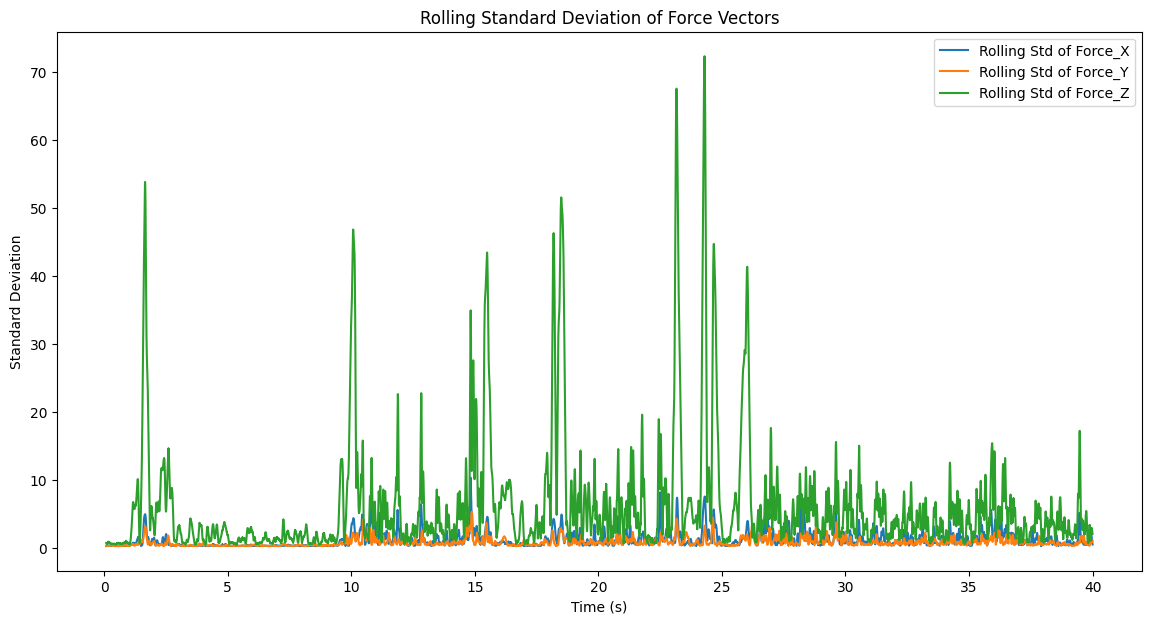

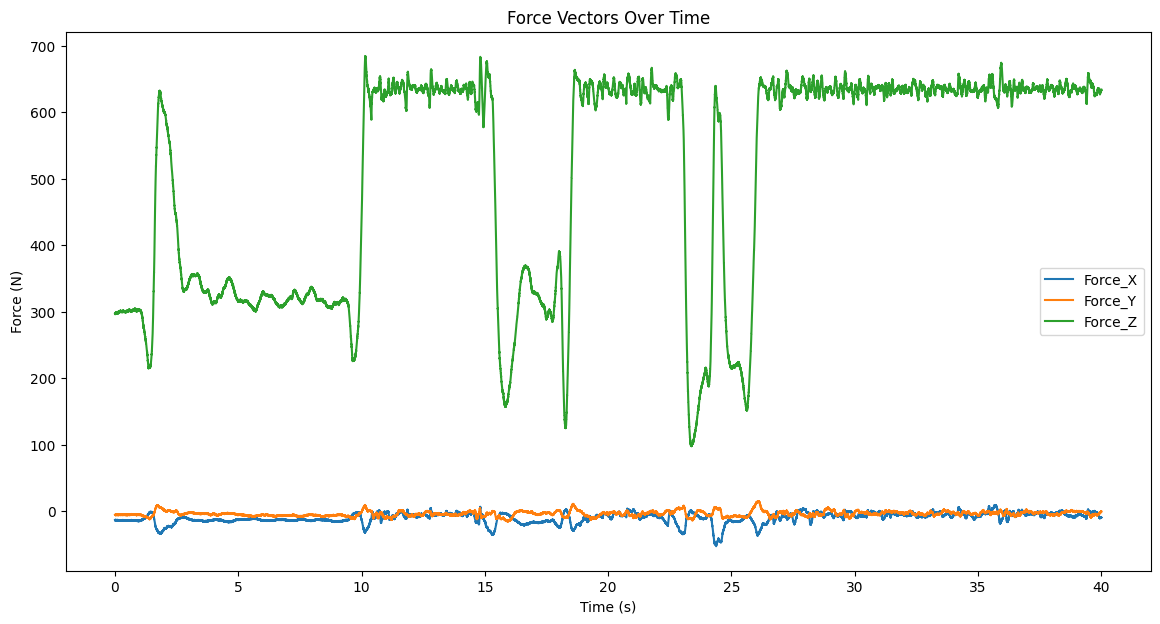

In [3]:
fp_data_capture.calculate_rolling_std()
fp_data_capture.plot_rolling_std()
fp_data_capture.plot_force_vectors()

COP Velocity 

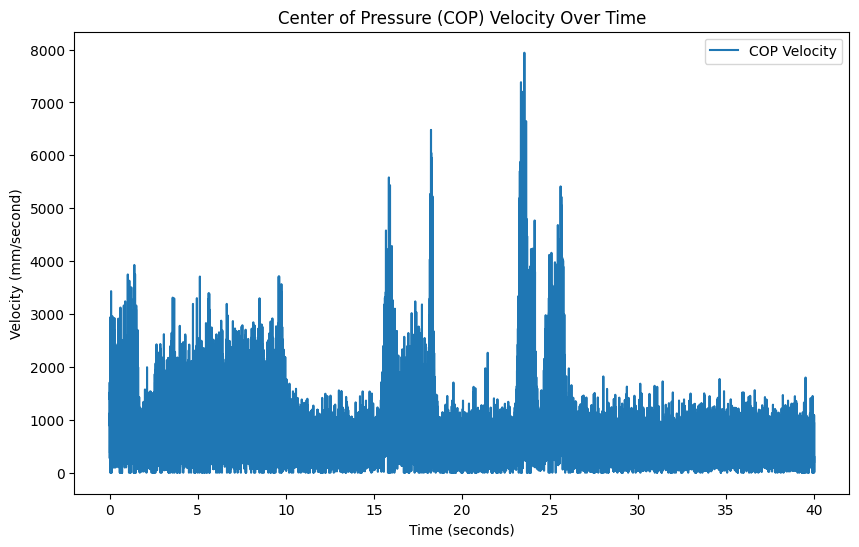

In [4]:
fp_data_capture.calculate_and_plot_cop_velocity()

Gif for 10

In [5]:
gif_filename = base_file_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'
#fp_data_capture.generate_cop_trace_gif(gif_filename)
fp_data_capture.generate_cop_trace_gif_fu_only(gif_filename)

GIF saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/10_MNTRL_MC_V1__2024-02-14 11:20:40.797755.gif



<span style="font-size:24px;">Spot Check MOCAP to RADAR Time sync value.</span>


Choose Capture

In [8]:
participant='04'
movement = "MNTRL"
version = "V2"

Ensure it exists

In [9]:
MOCAP_capture = f"{participant}_{movement}_MC_{version}"
RADAR_capture = f"{participant}_{movement}_RR_{version}"

MOCAP_spot_check_path = f"/Volumes/DC_LaCie/Yoga_Study_MOCAP_Data/{participant}/tsv/{MOCAP_capture}.tsv"

RADAR_spot_check_path = f"/Volumes/DC_LaCie/Yoga_Study_RADAR_Data_Renamed/{participant}/{RADAR_capture}.h5"

if not os.path.isfile(RADAR_spot_check_path):
    raise FileNotFoundError(f"The file '{RADAR_spot_check_path}' does not exist.")

(4, 1000, 256, 128)
(4, 1000, 128, 128)
float64


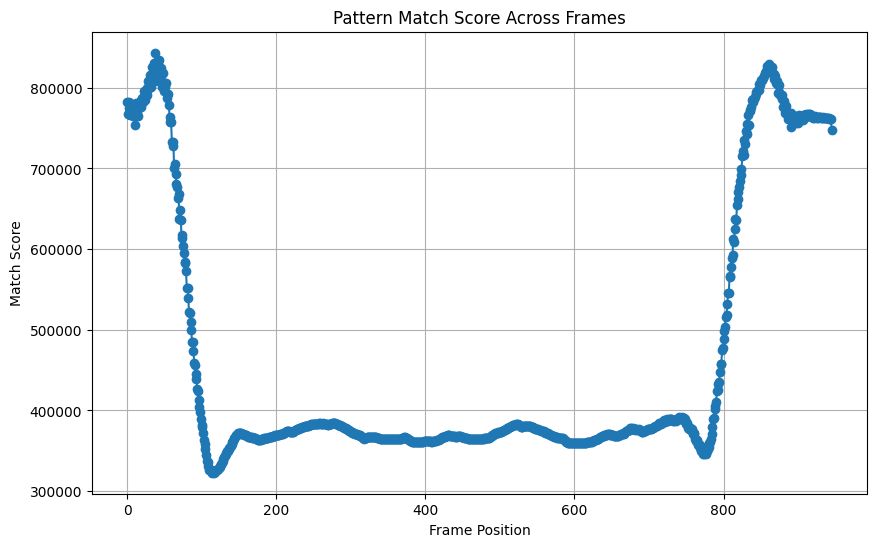

[38, 861]


In [10]:
# Initialize the FMCWRADARDataCapture object
test_data = FMCWRADARDataCapture(file_path=RADAR_spot_check_path)

# Load and save the data
dataCubes = test_data.load_and_save()

print(dataCubes.shape)

# Process the data with Range-Doppler processing
processed_data = test_data.range_doppler_processing(dataCubes)

print(processed_data.shape)
print(processed_data.dtype)

peaks, match_scores_summed = test_data.slide_normalized_actuator_pattern_over_data(processed_data)
test_data.plot_match_scores(match_scores_summed)
print(peaks)

In [5]:
test_path = RADAR_spot_check_path
gif_filename = test_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'
print(gif_filename)
gif_path = test_data.create_gif(processed_data[0], gif_filename)
print(f"GIF saved to {gif_path}")

Load MOCAP Data and Get Actuator Times

In [6]:
# Example usage:
mocap = MOCAPDataCapture(MOCAP_spot_check_path)
mocap.find_actuator_start_end_direction_changes()
print(mocap.start_actuator_time, mocap.end_actuator_time)

Processing File: 13_MNTRL_MC_V2.tsv
/Volumes/DC_LaCie/Yoga_Study_MOCAP_Data/13/tsv/13_MNTRL_MC_V2_vel.tsv
                  0               1               2               3   \
0         DATA_TYPES  Actuator_vel_X  Actuator_vel_Y  Actuator_vel_Z   
1                                                                      
2     Actuator_vel_X  Actuator_vel_Y  Actuator_vel_Z   Wrist_R_vel_X   
3                  0               0               0               0   
4             -2.858          -0.319           0.727          -7.746   
...              ...             ...             ...             ...   
3998          -1.032           0.302          -0.675           2.691   
3999           0.556          -0.308            1.68           1.262   
4000          -0.476           0.185           0.147           1.014   
4001           0.475           0.644          -0.549          -2.244   
4002               0               0               0               0   

                 4           

Load RADAR Data and Get Actuator Frames

(4, 1000, 256, 128)
(4, 1000, 128, 128)
float64
(1000, 128, 128)
(55, 128, 128)


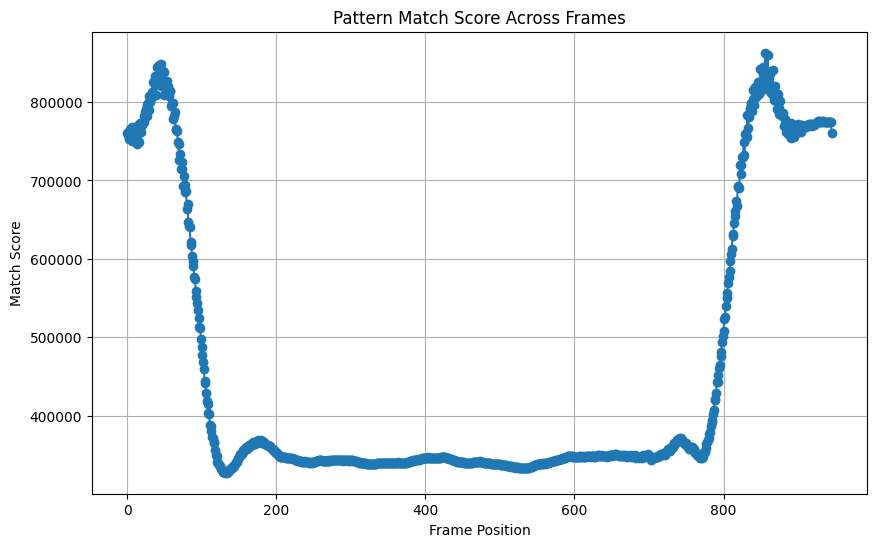

[45, 856]


In [ ]:
# Initialize the FMCWRADARDataCapture object
test_data = FMCWRADARDataCapture(file_path=RADAR_spot_check_path)

# Load and save the data
dataCubes = test_data.load_and_save()

print(dataCubes.shape)

# Process the data with Range-Doppler processing
processed_data = test_data.range_doppler_processing(dataCubes)

print(processed_data.shape)
print(processed_data.dtype)

peaks, match_scores_summed = test_data.slide_normalized_actuator_pattern_over_data(processed_data)
test_data.plot_match_scores(match_scores_summed)
print(peaks)

Calculate Seconds Per Frame

In [7]:
seconds_per_frame = (mocap.end_actuator_time - mocap.start_actuator_time)/(peaks[1]-peaks[0])
print(f" Seconds per frame for {MOCAP_capture} and {RADAR_capture}: {seconds_per_frame}")

 Seconds per frame for 13_MNTRL_MC_V2 and 13_MNTRL_RR_V2: 0.03881627620221949


<span style="font-size:24px;"> LOOP over ALL RADAR/MOCAP Data to average frame time. 

In [6]:
# Define the lists of parameters
participants = ['01', '02', '03', '04', '05', '08', '10', '12', '13', '14', '15', '16', '18', '22', '24']
# participants = ['04']
movements = ["MNTRL", "MNTRR"]
versions = ["V1", "V2", "V3"]

# Initialize a list to store seconds per frame for each valid combination
seconds_per_frame_list = []
problem_list = []
RADAR_seconds_per_frame_list = []

# Loop over each combination of participant, movement, and version
for participant in participants:
    for movement in movements:
        for version in versions:
            # Construct file paths
            MOCAP_capture = f"{participant}_{movement}_MC_{version}"
            RADAR_capture = f"{participant}_{movement}_RR_{version}"
            
            MOCAP_spot_check_path = f"/Volumes/DANS SAND/Yoga_Study_MOCAP_Data/{participant}/tsv/{MOCAP_capture}.tsv"

            RADAR_spot_check_path = f"/Volumes/DANS SAND/Yoga_Study_RADAR_Data_Renamed/{participant}/{RADAR_capture}.h5"

            # Check if RADAR file exists
            if os.path.isfile(RADAR_spot_check_path):
                try:
                    mocap = MOCAPDataCapture(MOCAP_spot_check_path)
                    mocap.find_actuator_start_end_direction_changes()
                    print(mocap.start_actuator_time, mocap.end_actuator_time)
                except Exception as e:
                    print(f"An error occurred: {e}")
                    print("Actuator Vel Not Found")
                    problem_list.append((participant,movement,version))
                    continue

                # Process RADAR data
                radar = FMCWRADARDataCapture(file_path=RADAR_spot_check_path)
                dataCubes = radar.load_and_save()
                processed_data = radar.range_doppler_processing(dataCubes)
                peaks, match_scores_summed = radar.slide_normalized_actuator_pattern_over_data(processed_data)

                # Ensure valid peaks for calculation
                if len(peaks) > 1:
                    seconds_per_frame = (mocap.end_actuator_time - mocap.start_actuator_time) / (peaks[1] - peaks[0])
                    df_RADAR_seconds_per_frame = RADAR_seconds_per_frame_list.append({'RADAR_capture': RADAR_capture, 'Seconds_per_Frame': seconds_per_frame, 'MOCAP_Start_Time': mocap.start_actuator_time, 'RADAR_Start_Frame': peaks[0]})
                    print(f"{RADAR_capture} seconds per frame: {seconds_per_frame}")
                    if seconds_per_frame > .037 or seconds_per_frame < 0.036:
                        problem_list.append((participant,movement,version))
                        print(f"PROBLEM with timing of {(participant,movement,version)}")
                    seconds_per_frame_list.append(seconds_per_frame)
                else:
                    print(f"Error: Invalid peaks for {MOCAP_capture} and {RADAR_capture}")
            else:
                print(f"RADAR file not found for {RADAR_capture}")
            

# Calculate and print the average seconds per frame after all iterations
if seconds_per_frame_list:
    average_seconds_per_frame = sum(seconds_per_frame_list) / len(seconds_per_frame_list)
    print(f"Average seconds per frame: {average_seconds_per_frame}")
    print(f"The standard deviation of the set is {statistics.stdev(seconds_per_frame_list)}")
else:
    print("No valid data found to calculate average seconds per frame.")

# Once the loop is done, create the DataFrame
df_RADAR_seconds_per_frame = pd.DataFrame(RADAR_seconds_per_frame_list)
# Save the DataFrame to a CSV file
csv_file_path = '/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/radar_seconds_per_frame_t0.csv'  # Adjust the path as needed
df_RADAR_seconds_per_frame.to_csv(csv_file_path, index=False)

print(f'DataFrame saved to {csv_file_path}')


Processing File: 01_MNTRL_MC_V1.tsv
/Volumes/DANS SAND/Yoga_Study_MOCAP_Data/01/tsv/01_MNTRL_MC_V1_vel.tsv
Start actuator time: 1.86, End actuator time: 33.32
1.86 33.32
01_MNTRL_RR_V1 seconds per frame: 0.03645422943221321
Processing File: 01_MNTRL_MC_V2.tsv
/Volumes/DANS SAND/Yoga_Study_MOCAP_Data/01/tsv/01_MNTRL_MC_V2_vel.tsv
Start actuator time: 1.9000000000000001, End actuator time: 33.15
1.9000000000000001 33.15
01_MNTRL_RR_V2 seconds per frame: 0.03646441073512252
Processing File: 01_MNTRL_MC_V3.tsv
/Volumes/DANS SAND/Yoga_Study_MOCAP_Data/01/tsv/01_MNTRL_MC_V3_vel.tsv
Start actuator time: 1.92, End actuator time: 34.63
1.92 34.63
01_MNTRL_RR_V3 seconds per frame: 0.03654748603351955
Processing File: 01_MNTRR_MC_V1.tsv
/Volumes/DANS SAND/Yoga_Study_MOCAP_Data/01/tsv/01_MNTRR_MC_V1_vel.tsv
Start actuator time: 1.9100000000000001, End actuator time: 32.980000000000004
1.9100000000000001 32.980000000000004
01_MNTRR_RR_V1 seconds per frame: 0.036467136150234745
Processing File: 01_M

In [ ]:
print(problem_list)

[('13', 'MNTRL', 'V1'), ('13', 'MNTRL', 'V2'), ('13', 'MNTRL', 'V3')]


In [ ]:
correct_seconds_per_frame_list = [value for value in seconds_per_frame_list if value > .034 and value < .04]
np.average(correct_seconds_per_frame_list)

0.03779268292682927

<span style="font-size:24px;"> RADAR TEST CODE. </span>

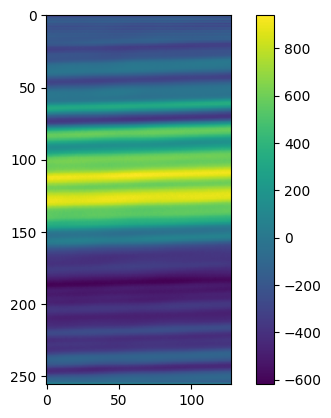

(4, 1000, 256, 128)
(4, 1000, 128, 128)


In [ ]:
# Define the path to the test data
test_path = "/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_RADAR_Data/02/02_CRW2L_RR_V1.h5"

# Initialize the FMCWRADARDataCapture object
test_data = FMCWRADARDataCapture(file_path=test_path)

# Load and save the data
dataCubes = test_data.load_and_save()

print(dataCubes.shape)

# Process the data with Range-Doppler processing
processed_data = test_data.range_doppler_processing(dataCubes)

print(processed_data.shape)

In [ ]:
filter_pattern = test_data.generate_actuator_filter(dataCubes)
print(filter_pattern.shape)

(55, 128, 128)


In [ ]:
# # Normalize the pattern and data (z-scoring)
# pattern_mean = np.mean(filter_pattern)
# pattern_std = np.std(filter_pattern)
# # Check if standard deviation is zero and handle it
# pattern_normalized = (filter_pattern - pattern_mean) / pattern_std if pattern_std else filter_pattern - pattern_mean

In [ ]:
# # Define the directory path where you want to save the file
# directory_path = '/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/filter_patterns'

# # Check if the directory exists, if not, create it
# if not os.path.exists(directory_path):
#     os.makedirs(directory_path)

# # Define the full path for the file to be saved
# file_path = os.path.join(directory_path, 'normalized_actuator_pattern_in_radar.npy')

# # Save the numpy array to the specified file
# np.save(file_path, pattern_normalized)

# print(f"File saved to {file_path}")

(1000, 128, 128)
(55, 128, 128)


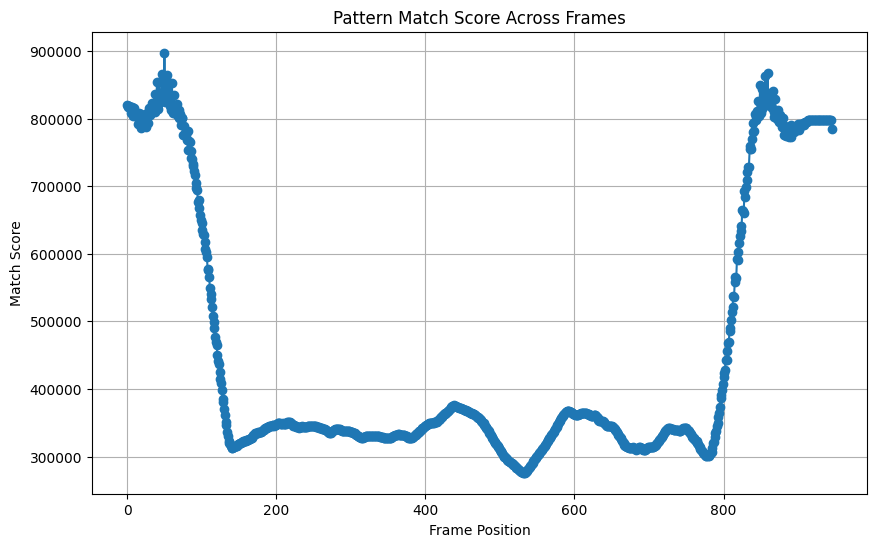

In [ ]:
peaks, match_scores_summed = test_data.slide_normalized_actuator_pattern_over_data(processed_data)
test_data.plot_match_scores(match_scores_summed)

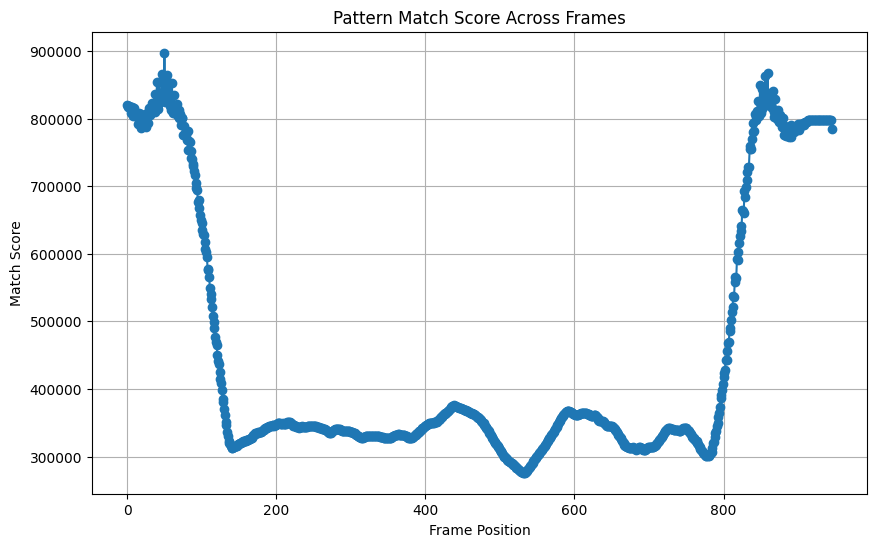

In [ ]:
peaks, match_scores_summed = test_data.slide_pattern_over_data(filter_pattern, processed_data)
test_data.plot_match_scores(match_scores_summed)



In [ ]:
print(peaks)

[50, 859]


In [ ]:

# Example usage
start_frame_1 = 14
end_frame_1 = 27  # Pattern length is 14 frames, so the end_frame is start_frame + 13
start_frame_2 = 966
end_frame_2 = 979

# Adjust the end_frame to be start_frame + pattern length - 1
end_frame_1 = start_frame_1 + filter_pattern.shape[0] - 1
end_frame_2 = start_frame_2 + filter_pattern.shape[0] - 1

score_1 = test_data.manual_correlation(filter_pattern, processed_data[0], start_frame_1, end_frame_1)
score_2 = test_data.manual_correlation(filter_pattern, processed_data[0], start_frame_2, end_frame_2)

print(f"Correlation score for first event: {score_1}")
print(f"Correlation score for second event: {score_2}")


Correlation score for first event: 212991.9999999999
Correlation score for second event: 193849.46389539557


RADAR GIF

In [ ]:
test_path = RADAR_spot_check_path
gif_filename = test_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'
print(gif_filename)
gif_path = test_data.create_gif(processed_data[0], gif_filename)
print(f"GIF saved to {gif_path}")

13_MNTRR_RR_V3__2024-02-06 13:39:28.588071.gif
GIF saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/13_MNTRR_RR_V3__2024-02-06 13:39:28.588071.gif


In [ ]:
gif_filename = "filter_pattern_v1.gif"
print(gif_filename)
gif_path = test_data.create_gif(filter_pattern, gif_filename)
print(f"GIF saved to {gif_path}")

filter_pattern_v1.gif
GIF saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/filter_pattern_v1.gif


<span style="font-size:24px;"> FORCE PLATE TEST CODE. </span>

In [3]:
# Usage example:
base_file_path = '/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_FP_Data/04/04_MNTRL_MC_V1.tsv'
fp_data_capture = FPDataCapture('/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_FP_Data/04/04_MNTRL_MC_V1.tsv')
lift_times, down_times = fp_data_capture.identify_foot_lift()
# Now you can access the times directly
print(f"Foot Lift Times: {lift_times}")
print(f"Foot Down Times: {down_times}")

fp_data_capture.convert_force_plate_time_to_frames()

print(f"Foot Lift FRAMES: {fp_data_capture.foot_lift_frames_after_actuator}")
print(f"Foot Down FRAMES: {fp_data_capture.foot_down_frames_after_actuator}")



Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/04_MNTRL_MC_V1_f_1.csv
Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/04_MNTRL_MC_V1_f_2.csv
Foot Lift Times: [9.97583, 17.925, 25.9625]
Foot Down Times: [14.94917, 22.88417]


ValueError: ('Lengths must match to compare', (6,), (2,))

FMCW RADAR Data Class Testing

RADAR Range-Doppler Processing

In [ ]:
# Process the data with Range-Doppler processing
processed_data = test_data.range_doppler_processing(dataCubes)

In [ ]:
print(processed_data.shape)

(4, 1000, 128, 128)


RADAR Range-Doppler GIF Generation

In [ ]:
test_path = RADAR_spot_check_path

In [ ]:
gif_filename = test_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'
print(gif_filename)
gif_path = test_data.create_gif(processed_data[0], gif_filename)
print(f"GIF saved to {gif_path}")

13_CHAIR_RR_V1__2024-02-06 13:47:23.225415.gif
GIF saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/13_CHAIR_RR_V1__2024-02-06 13:47:23.225415.gif


RADAR AOA Processing

In [ ]:
# Assume `aoa_data` is the output from your AoA processing function and is a 3D numpy array.
aoa_data = test_data.angle_of_arrival_processing(dataCubes)

RADAR AOA GIF Generation

In [ ]:
# Specify the filename for the GIF. This should include the full path or be relative to the current directory.
gif_filename = "aoa_heatmap.gif"

# Call the create_gif function to generate the GIF from the AoA data.
test_data.create_gif(aoa_data, gif_filename)

# Now you have a GIF animation of your AoA heatmaps.


'/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/aoa_heatmap.gif'

<span style="font-size:24px;"> MOCAP TEST CODE. </span>

MOCAP Data Loading Test

In [ ]:
# Example usage:
mocap = MOCAPDataCapture('/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_Data/02/tsv/02_CRW2L_MC_V1.tsv')
mocap.find_actuator_start_end_direction_changes()
print(mocap.start_actuator_time, mocap.end_actuator_time)

Participant ID 02
Saved: 02_CRW2L_MC_V1_pos.tsv
Saved: 02_CRW2L_MC_V1_vel.tsv
Position and velocity data loaded and processed.
2     frame   time participant_id  Actuator_pos_X  Actuator_pos_Y  \
0         0   0.00             02     5057.750000      405.817993   
1         1   0.01             02     5057.748047      405.824005   
2         2   0.02             02     5057.748047      405.824005   
3         3   0.03             02     5057.728027      405.834015   
4         4   0.04             02     5057.725098      405.839996   
...     ...    ...            ...             ...             ...   
3995   3995  39.95             02     5052.921875      393.751007   
3996   3996  39.96             02     5052.926758      393.752991   
3997   3997  39.97             02     5052.925781      393.746002   
3998   3998  39.98             02     5052.926758      393.752991   
3999   3999  39.99             02     5052.935059      393.734009   

2     Actuator_pos_Z  Wrist_R_pos_X  Wrist_R

Participant ID 02
Saved: 02_CRW2L_MC_V1_pos.tsv
Saved: 02_CRW2L_MC_V1_vel.tsv
Position and velocity data loaded and processed.
2     frame   time participant_id  Actuator_pos_X  Actuator_pos_Y  \
0         0   0.00             02     5057.750000      405.817993   
1         1   0.01             02     5057.748047      405.824005   
2         2   0.02             02     5057.748047      405.824005   
3         3   0.03             02     5057.728027      405.834015   
4         4   0.04             02     5057.725098      405.839996   
...     ...    ...            ...             ...             ...   
3995   3995  39.95             02     5052.921875      393.751007   
3996   3996  39.96             02     5052.926758      393.752991   
3997   3997  39.97             02     5052.925781      393.746002   
3998   3998  39.98             02     5052.926758      393.752991   
3999   3999  39.99             02     5052.935059      393.734009   

2     Actuator_pos_Z  Wrist_R_pos_X  Wrist_R

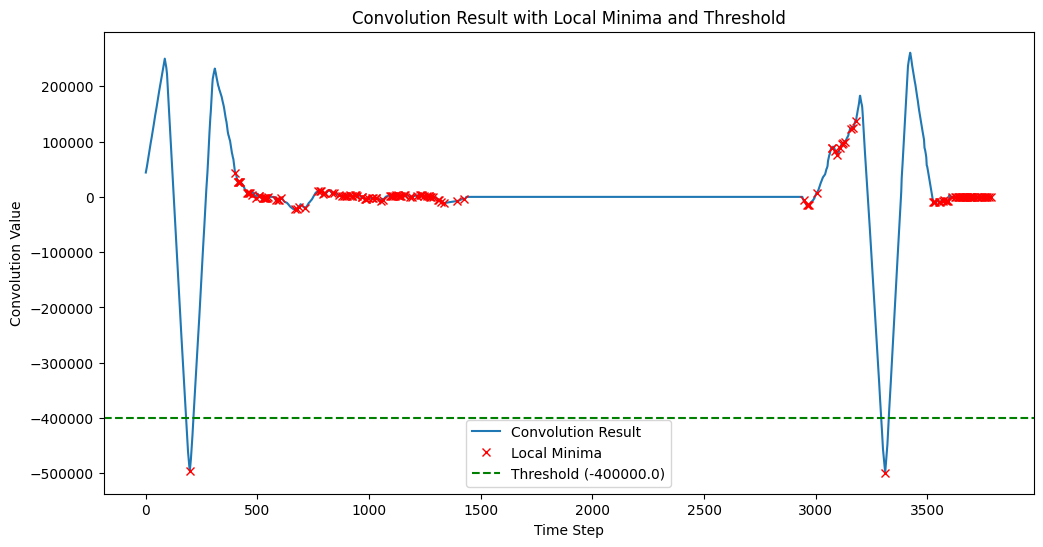

In [ ]:
# Example usage:
mocap = MOCAPDataCapture('/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_Data/02/tsv/02_CRW2L_MC_V1.tsv')
actuator_vel_x = mocap.velocity_data['Actuator_vel_X'].to_numpy()
mocap.plot_convolution_result(actuator_vel_x)

In [ ]:
# Usage example:
base_file_path = '/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_FP_Data/04/04_MNTRL_MC_V1.tsv'
fp_data_capture = FPDataCapture('/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_FP_Data/04/04_MNTRL_MC_V1.tsv')
fp_data_capture.identify_foot_lift()
# Now you can access the times directly
print(fp_data_capture.foot_lift_times_f_1)
print(fp_data_capture.foot_down_times_f_1)
print(fp_data_capture.foot_lift_times_f_2)
print(fp_data_capture.foot_down_times_f_2)


Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/04_MNTRL_MC_V1_f_1.csv
Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/04_MNTRL_MC_V1_f_2.csv
[9.97583, 9.97667, 9.9775, 9.97833, 9.97917, 9.98, 9.98083, 9.98167, 9.9825, 9.98333, 9.98417, 9.985, 9.98583, 9.98667, 9.9875, 9.98833, 9.98917, 9.99, 9.99083, 9.99167, 9.9925, 9.99333, 9.99417, 9.995, 9.99583, 9.99667, 9.9975, 9.99833, 9.99917, 10.0, 10.00083, 10.00167, 10.0025, 10.00333, 10.00417, 10.005, 10.00583, 10.00667, 10.0075, 10.00833, 10.00917, 10.01, 10.01083, 10.01167, 10.0125, 10.01333, 10.01417, 10.015, 10.01583, 10.01667, 10.0175, 10.01833, 10.01917, 10.02, 10.02083, 10.02167, 10.0225, 10.02333, 10.02417, 10.025, 10.02583, 10.02667, 10.0275, 10.02833, 10.02917, 10.03, 10.03083, 10.03167, 10.0325, 10.03333, 10.03417, 10.035, 10.03583, 10.03667, 10.0375, 10.03833, 10.03917, 10.0